<a href="https://colab.research.google.com/github/jo5382/image-classification/blob/main/Randomforest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
from sklearn import svm
import os
from skimage.transform import resize  #to resize the image
from skimage.io import imread # to read image
import numpy as np
from sklearn.model_selection import train_test_split

In [ ]:
os.listdir("/content/drive/MyDrive/kvasir-dataset")

['normal-cecum',
 'dyed-resection-margins',
 'ulcerative-colitis',
 'esophagitis',
 'dyed-lifted-polyps',
 'polyps',
 'normal-z-line',
 'normal-pylorus']

In [ ]:
len(os.listdir('/content/drive/MyDrive/kvasir-dataset'))

8

In [ ]:
flat_data_arr=[]
target_arr=[]
categories=['ulcerative-colitis','polyps','normal-cecum','dyed-resection-margins','esophagitis','dyed-lifted-polyps','normal-z-line','normal-pylorus']
datadir='/content/drive/MyDrive/kvasir-dataset'


In [ ]:
for i in categories:
  path=os.path.join(datadir,i)
  for img in os.listdir(path):
    img_array=imread(os.path.join(path,img))
    img_resize=resize(img_array,(150,150,3))
    flat_data_arr.append(img_resize.flatten())
    target_arr.append(categories.index(i))


In [ ]:
flat_data=np.array(flat_data_arr)
target=np.array(target_arr)
df=pd.DataFrame(flat_data)
df

,0,1,2,3,4,5,6,7,8,9,...,67490,67491,67492,67493,67494,67495,67496,67497,67498,67499
0,0.012935,0.015906,0.014419,0.016160,0.016189,0.015676,0.016545,0.016545,0.015139,0.017083,...,0.004385,0.004868,0.005843,0.005319,0.006061,0.006062,0.005888,0.002569,0.002569,0.002534
1,0.015737,0.015737,0.010932,0.018889,0.018889,0.018771,0.019080,0.019080,0.019080,0.018459,...,0.007803,0.008749,0.008749,0.008747,0.007514,0.007514,0.007863,0.004758,0.004758,0.006118
2,0.006700,0.006700,0.006692,0.006038,0.006038,0.004341,0.005202,0.005203,0.002536,0.005340,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,0.015827,0.018798,0.016809,0.017747,0.017776,0.013637,0.018809,0.018809,0.011622,0.018293,...,0.006220,0.007726,0.007832,0.007769,0.006613,0.008143,0.007307,0.003978,0.005699,0.004758
4,0.013284,0.013284,0.013275,0.015627,0.015627,0.014176,0.015634,0.015712,0.014722,0.013966,...,0.005265,0.005608,0.005743,0.005461,0.004338,0.007156,0.005614,0.002460,0.002657,0.002549
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4005,0.074510,0.074510,0.074510,0.074510,0.074510,0.074510,0.074510,0.074510,0.074510,0.074510,...,0.074510,0.074510,0.074510,0.074510,0.074510,0.074510,0.074510,0.074510,0.074510,0.074510
4006,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4007,0.001206,0.001206,0.001206,0.000489,0.000489,0.000489,0.000437,0.000437,0.000437,0.000246,...,0.000245,0.001133,0.001133,0.001133,0.001758,0.001758,0.001758,0.000945,0.000945,0.000945
4008,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [ ]:
df['Target']=target
df

,0,1,2,3,4,5,6,7,8,9,...,67491,67492,67493,67494,67495,67496,67497,67498,67499,Target
0,0.012935,0.015906,0.014419,0.016160,0.016189,0.015676,0.016545,0.016545,0.015139,0.017083,...,0.004868,0.005843,0.005319,0.006061,0.006062,0.005888,0.002569,0.002569,0.002534,0
1,0.015737,0.015737,0.010932,0.018889,0.018889,0.018771,0.019080,0.019080,0.019080,0.018459,...,0.008749,0.008749,0.008747,0.007514,0.007514,0.007863,0.004758,0.004758,0.006118,0
2,0.006700,0.006700,0.006692,0.006038,0.006038,0.004341,0.005202,0.005203,0.002536,0.005340,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0
3,0.015827,0.018798,0.016809,0.017747,0.017776,0.013637,0.018809,0.018809,0.011622,0.018293,...,0.007726,0.007832,0.007769,0.006613,0.008143,0.007307,0.003978,0.005699,0.004758,0
4,0.013284,0.013284,0.013275,0.015627,0.015627,0.014176,0.015634,0.015712,0.014722,0.013966,...,0.005608,0.005743,0.005461,0.004338,0.007156,0.005614,0.002460,0.002657,0.002549,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4005,0.074510,0.074510,0.074510,0.074510,0.074510,0.074510,0.074510,0.074510,0.074510,0.074510,...,0.074510,0.074510,0.074510,0.074510,0.074510,0.074510,0.074510,0.074510,0.074510,7
4006,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7
4007,0.001206,0.001206,0.001206,0.000489,0.000489,0.000489,0.000437,0.000437,0.000437,0.000246,...,0.001133,0.001133,0.001133,0.001758,0.001758,0.001758,0.000945,0.000945,0.000945,7
4008,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7


In [ ]:
x=df.iloc[:,:-1]  #input data
y =df.iloc[:, -1]  # Extract the first (and only) column as a Series
   #output data

In [ ]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)


In [ ]:
from sklearn import svm
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=50)


In [ ]:
from sklearn.preprocessing import StandardScaler
sc= StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.fit_transform(x_test)



In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf= RandomForestClassifier()
rf.fit(x_train,y_train)
pred=rf.predict(x_test)

In [ ]:
from sklearn.metrics import classification_report
print("classification Report:",classification_report(y_test,pred))

classification Report:               precision    recall  f1-score   support

           0       0.71      0.68      0.70        88
           1       0.60      0.61      0.60       109
           2       0.76      0.85      0.80        82
           3       0.62      0.51      0.56       100
           4       0.76      0.81      0.78        98
           5       0.60      0.64      0.62       107
           6       0.75      0.75      0.75       106
           7       0.92      0.92      0.92       112

    accuracy                           0.72       802
   macro avg       0.72      0.72      0.72       802
weighted avg       0.72      0.72      0.72       802



In [ ]:
from sklearn.metrics import roc_curve


ROC AUC Score: 0.93


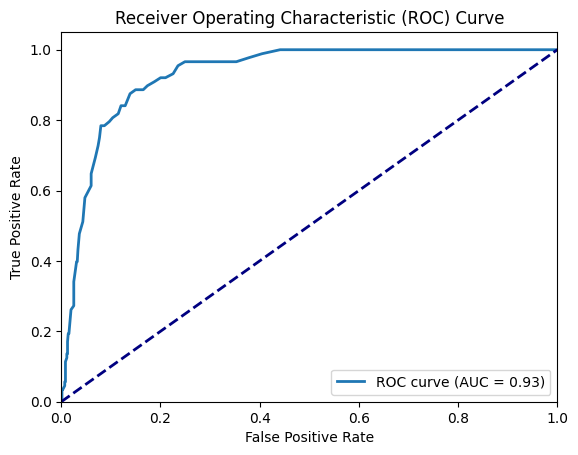

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
import matplotlib.pyplot as plt

# Create and fit the model
rf = RandomForestClassifier()
rf.fit(x_train, y_train)

# Create a test set
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Get predicted probability scores for the positive class (1)
y_scores = rf.predict_proba(x_test)[:, 1]

# Ensure that y_test is binary (0 or 1) or one-dimensional
# If it's not binary, you can convert it to binary format for a specific class
# For example, if you want to analyze class 1 as the positive class:
positive_class = 1
y_test = (y_test == positive_class).astype(int)

# Calculate ROC AUC
roc_auc = roc_auc_score(y_test, y_scores)

# Print the ROC AUC score
print(f"ROC AUC Score: {roc_auc:.2f}")

# Plot the ROC curve (optional)
fpr, tpr, _ = roc_curve(y_test, y_scores)
plt.figure()
plt.plot(fpr, tpr, lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()
